<a href="https://colab.research.google.com/github/chrisZerv/Analyse-Deaths-involving-Police-in-the-United-States/blob/main/Fatal_Force.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 57.8 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


## Import Statements

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [3]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [4]:
# Check the shape (rows, columns) of each DataFrame
print("Shape of Median Household Income DataFrame:", df_hh_income.shape)
print("Shape of Poverty Rate DataFrame:", df_pct_poverty.shape)
print("Shape of High School Completion DataFrame:", df_pct_completed_hs.shape)
print("Shape of Racial Demographics DataFrame:", df_share_race_city.shape)
print("Shape of Fatalities DataFrame:", df_fatalities.shape)

Shape of Median Household Income DataFrame: (29322, 3)
Shape of Poverty Rate DataFrame: (29329, 3)
Shape of High School Completion DataFrame: (29329, 3)
Shape of Racial Demographics DataFrame: (29268, 7)
Shape of Fatalities DataFrame: (2535, 14)


In [5]:
# Check the column names for each DataFrame
print("\nColumn names in Median Household Income DataFrame:", df_hh_income.columns)
print("Column names in Poverty Rate DataFrame:", df_pct_poverty.columns)
print("Column names in High School Completion DataFrame:", df_pct_completed_hs.columns)
print("Column names in Racial Demographics DataFrame:", df_share_race_city.columns)
print("Column names in Fatalities DataFrame:", df_fatalities.columns)


Column names in Median Household Income DataFrame: Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Column names in Poverty Rate DataFrame: Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Column names in High School Completion DataFrame: Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Column names in Racial Demographics DataFrame: Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Column names in Fatalities DataFrame: Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [6]:
# Check for any missing (NaN) values in each DataFrame
print("\nNaN values in Median Household Income DataFrame:\n", df_hh_income.isnull().sum())
print("NaN values in Poverty Rate DataFrame:\n", df_pct_poverty.isnull().sum())
print("NaN values in High School Completion DataFrame:\n", df_pct_completed_hs.isnull().sum())
print("NaN values in Racial Demographics DataFrame:\n", df_share_race_city.isnull().sum())
print("NaN values in Fatalities DataFrame:\n", df_fatalities.isnull().sum())


NaN values in Median Household Income DataFrame:
 Geographic Area     0
City                0
Median Income      51
dtype: int64
NaN values in Poverty Rate DataFrame:
 Geographic Area    0
City               0
poverty_rate       0
dtype: int64
NaN values in High School Completion DataFrame:
 Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64
NaN values in Racial Demographics DataFrame:
 Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64
NaN values in Fatalities DataFrame:
 id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illn

In [7]:
# Check for any duplicates in each DataFrame
print("\nDuplicate rows in Median Household Income DataFrame:", df_hh_income.duplicated().sum())
print("Duplicate rows in Poverty Rate DataFrame:", df_pct_poverty.duplicated().sum())
print("Duplicate rows in High School Completion DataFrame:", df_pct_completed_hs.duplicated().sum())
print("Duplicate rows in Racial Demographics DataFrame:", df_share_race_city.duplicated().sum())
print("Duplicate rows in Fatalities DataFrame:", df_fatalities.duplicated().sum())


Duplicate rows in Median Household Income DataFrame: 0
Duplicate rows in Poverty Rate DataFrame: 0
Duplicate rows in High School Completion DataFrame: 0
Duplicate rows in Racial Demographics DataFrame: 0
Duplicate rows in Fatalities DataFrame: 0


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [8]:
# Fill NaN values in Median Household Income DataFrame with 0 (or alternatively, you could drop them)
df_hh_income['Median Income'].fillna(0, inplace=True)


# Fill NaN values in Fatalities DataFrame
# Substitute 'armed', 'flee', and 'body_camera' with 'Unknown' if missing
df_fatalities['armed'].fillna('Unknown', inplace=True)
df_fatalities['flee'].fillna('Unknown', inplace=True)

# For 'age', it may make more sense to fill missing values with the median age
median_age = df_fatalities['age'].median()
df_fatalities['age'].fillna(median_age, inplace=True)

# Fill NaN values in 'race' with 'Unknown'
df_fatalities['race'].fillna('Unknown', inplace=True)


In [9]:
print("NaN values in Median Household Income DataFrame:\n", df_hh_income.isnull().sum())
print("NaN values in Fatalities DataFrame:\n", df_fatalities.isnull().sum())

NaN values in Median Household Income DataFrame:
 Geographic Area    0
City               0
Median Income      0
dtype: int64
NaN values in Fatalities DataFrame:
 id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [10]:
# Replace any problematic characters and convert the poverty_rate to numeric
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')

# Drop rows where the poverty_rate could not be converted to a number (NaN values)
df_pct_poverty_cleaned = df_pct_poverty.dropna(subset=['poverty_rate'])

# Group by 'Geographic Area' to get the average poverty rate per state
poverty_by_state = df_pct_poverty_cleaned.groupby('Geographic Area')['poverty_rate'].mean().reset_index()

# Sort the states by poverty rate from highest to lowest
poverty_by_state_sorted = poverty_by_state.sort_values(by='poverty_rate', ascending=False)


<ipython-input-11-e650451fe129>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='poverty_rate', y='Geographic Area', data=poverty_by_state_sorted, palette='coolwarm')


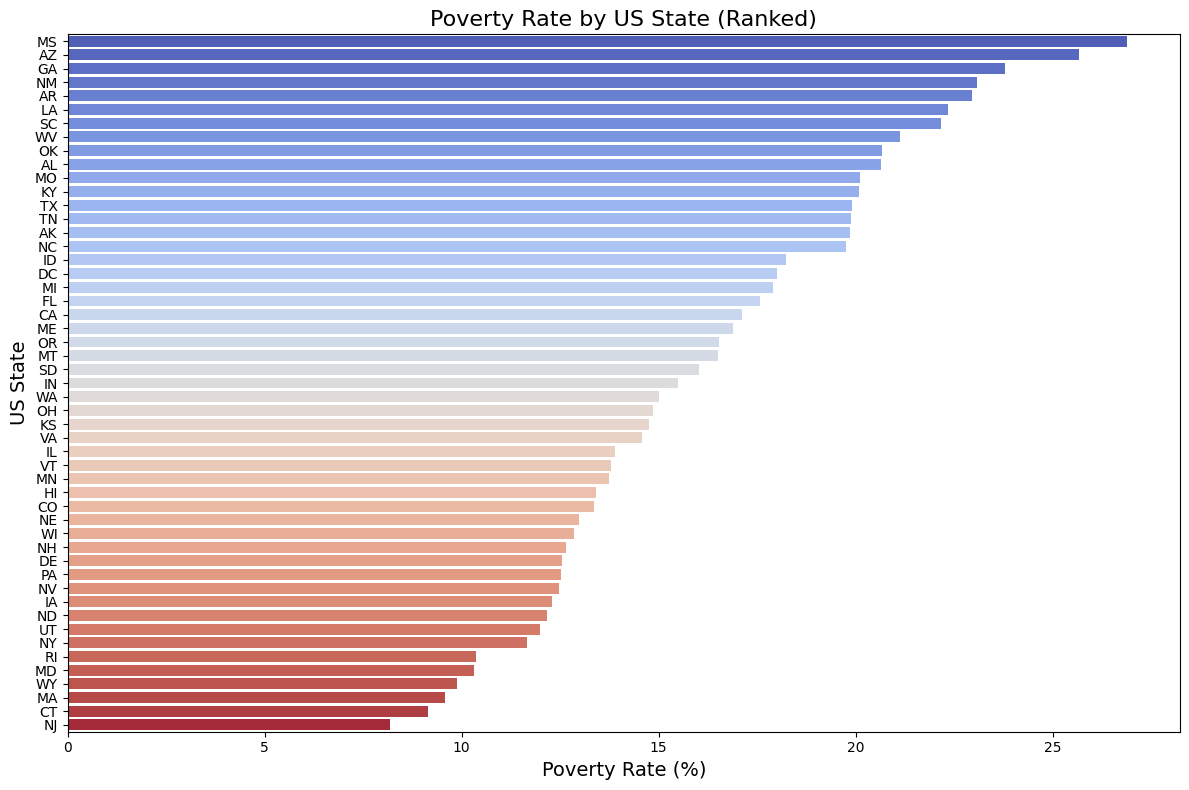

The state with the highest poverty rate is MS with a rate of 26.9%.
The state with the lowest poverty rate is NJ with a rate of 8.19%.


In [11]:
plt.figure(figsize=(12, 8))

# Create the barplot using seaborn
sns.barplot(x='poverty_rate', y='Geographic Area', data=poverty_by_state_sorted, palette='coolwarm')

# Add labels and title
plt.title('Poverty Rate by US State (Ranked)', fontsize=16)
plt.xlabel('Poverty Rate (%)', fontsize=14)
plt.ylabel('US State', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

# Find the states with highest and lowest poverty rates
highest_poverty_state = poverty_by_state_sorted.iloc[0]
lowest_poverty_state = poverty_by_state_sorted.iloc[-1]

# Output the results
print(f"The state with the highest poverty rate is {highest_poverty_state['Geographic Area']} with a rate of {highest_poverty_state['poverty_rate']:.3}%.")
print(f"The state with the lowest poverty rate is {lowest_poverty_state['Geographic Area']} with a rate of {lowest_poverty_state['poverty_rate']:.3}%.")

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

<ipython-input-12-814e1fa26d88>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='percent_completed_hs', y='Geographic Area', data=hs_graduation_by_state_sorted, palette='coolwarm')


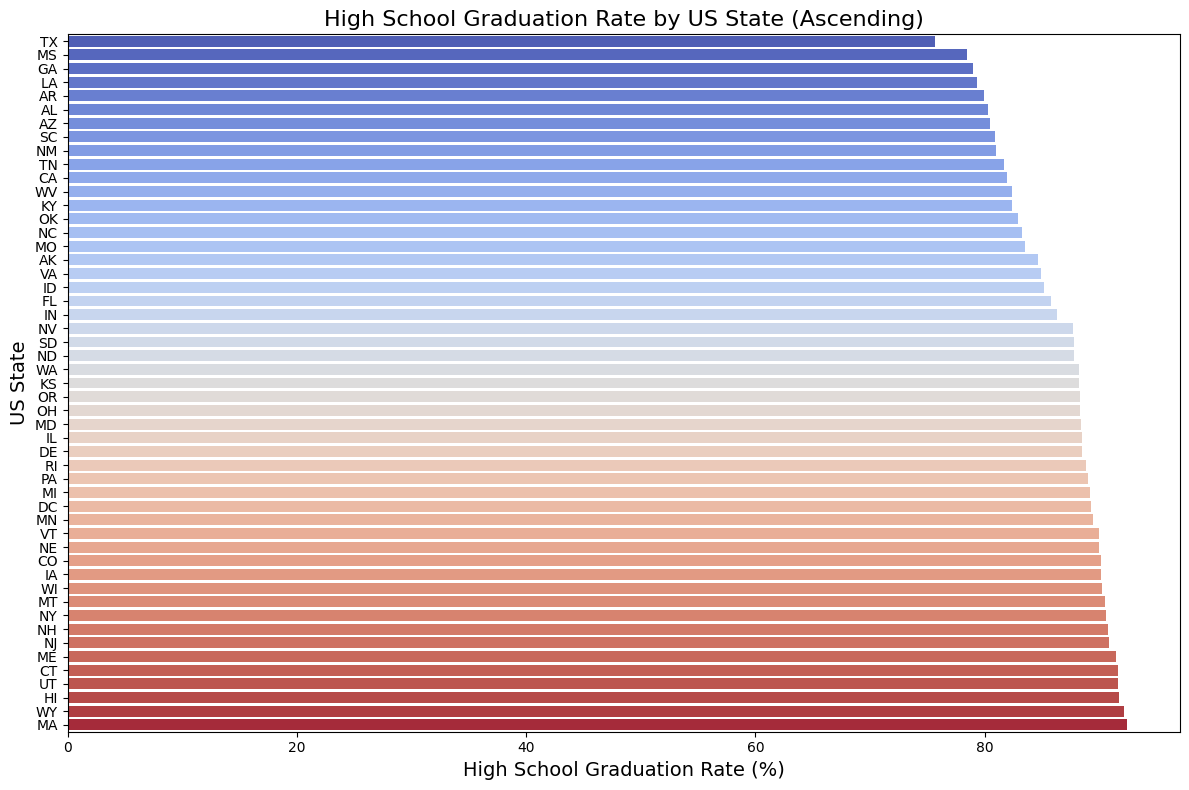

The state with the lowest high school graduation rate is TX with a rate of 75.7%.
The state with the highest high school graduation rate is MA with a rate of 92.4%.


In [12]:
# Convert the percent_completed_hs column to numeric and clean invalid data
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')

# Drop rows where percent_completed_hs could not be converted to a number (NaN values)
df_pct_completed_hs_cleaned = df_pct_completed_hs.dropna(subset=['percent_completed_hs'])

# Group by 'Geographic Area' to get the average high school completion rate per state
hs_graduation_by_state = df_pct_completed_hs_cleaned.groupby('Geographic Area')['percent_completed_hs'].mean().reset_index()

# Sort the states by high school completion rate in ascending order
hs_graduation_by_state_sorted = hs_graduation_by_state.sort_values(by='percent_completed_hs', ascending=True)

# Set up the figure size for plotting
plt.figure(figsize=(12, 8))

# Create the barplot using seaborn
sns.barplot(x='percent_completed_hs', y='Geographic Area', data=hs_graduation_by_state_sorted, palette='coolwarm')

# Add labels and title
plt.title('High School Graduation Rate by US State (Ascending)', fontsize=16)
plt.xlabel('High School Graduation Rate (%)', fontsize=14)
plt.ylabel('US State', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

# Find the states with the highest and lowest high school graduation rates
lowest_graduation_state = hs_graduation_by_state_sorted.iloc[0]
highest_graduation_state = hs_graduation_by_state_sorted.iloc[-1]

# Output the results
print(f"The state with the lowest high school graduation rate is {lowest_graduation_state['Geographic Area']} with a rate of {lowest_graduation_state['percent_completed_hs']:.3}%.")
print(f"The state with the highest high school graduation rate is {highest_graduation_state['Geographic Area']} with a rate of {highest_graduation_state['percent_completed_hs']:.3}%.")


# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [13]:
merged_data = pd.merge(
    poverty_by_state_sorted,
    hs_graduation_by_state_sorted,
    on='Geographic Area',
    how='inner'
)

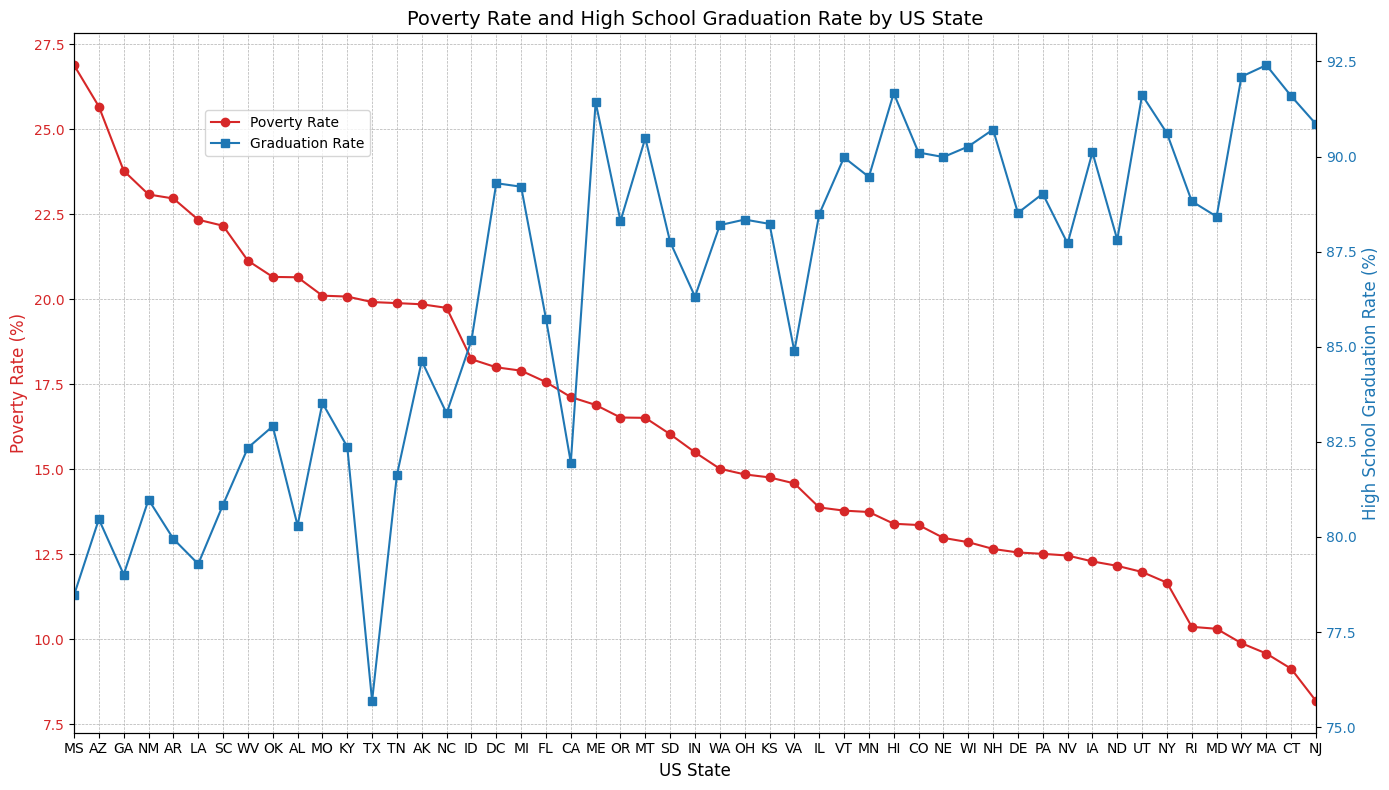

In [17]:
# Plotting the data using matplotlib for a dual-axis line chart
fig, ax1 = plt.subplots(figsize=(14, 8))

# First line plot for poverty rate (left y-axis)
ax1.set_xlabel('US State', fontsize=12)
ax1.set_ylabel('Poverty Rate (%)', color='tab:red', fontsize=12)
ax1.plot(merged_data['Geographic Area'], merged_data['poverty_rate'], color='tab:red', label='Poverty Rate', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Create a second y-axis for high school graduation rate
ax2 = ax1.twinx()
ax2.set_ylabel('High School Graduation Rate (%)', color='tab:blue', fontsize=12)
ax2.plot(merged_data['Geographic Area'], merged_data['percent_completed_hs'], color='tab:blue', label='Graduation Rate', marker='s')
ax2.tick_params(axis='y', labelcolor='tab:blue')



# Add title and improve layout
plt.title('Poverty Rate and High School Graduation Rate by US State', fontsize=14)
fig.tight_layout()

# Rotate x-axis labels for better visibility and spacing
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add gridlines for better readability
ax1.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)

# Set xlim
ax1.set_xlim(merged_data.index[0], merged_data.index[-1])

# Add a legend
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9), bbox_transform=ax1.transAxes)

# Show the plot
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

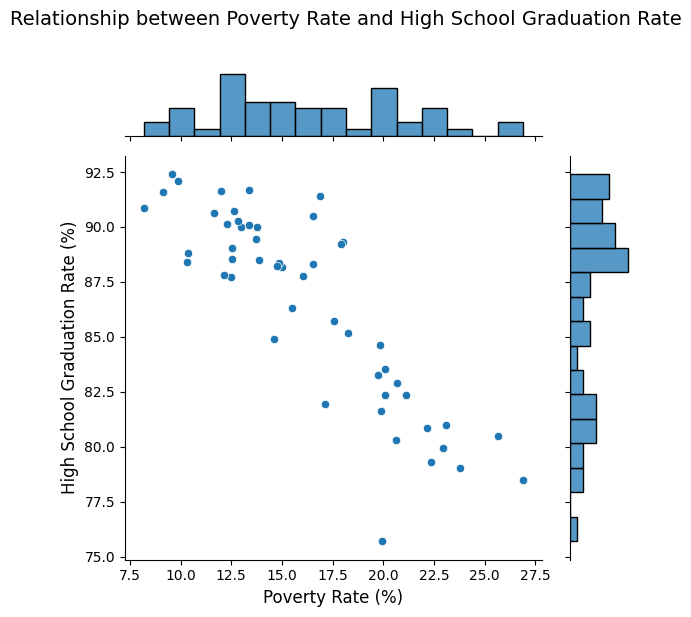

In [19]:
sns.jointplot(
    data=merged_data,
    x='poverty_rate',
    y='percent_completed_hs',
    kind='scatter',  # Can be changed to 'kde' or 'hex' for different styles
    marginal_kws=dict(bins=15, fill=True)
)

plt.suptitle('Relationship between Poverty Rate and High School Graduation Rate', y=1.02, fontsize=14)
plt.xlabel('Poverty Rate (%)', fontsize=12)
plt.ylabel('High School Graduation Rate (%)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

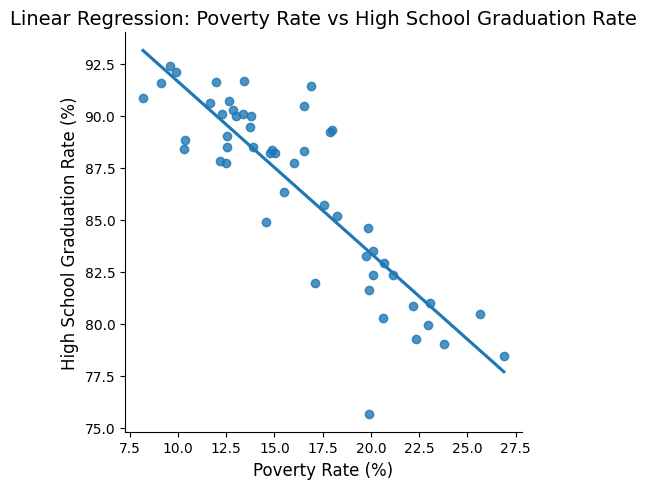

In [20]:
sns.lmplot(
    data=merged_data,
    x='poverty_rate',
    y='percent_completed_hs',
    ci=None  # Turn off confidence interval shading
)

# Adding labels and title
plt.title('Linear Regression: Poverty Rate vs High School Graduation Rate', fontsize=14)
plt.xlabel('Poverty Rate (%)', fontsize=12)
plt.ylabel('High School Graduation Rate (%)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [26]:
# Ensure that racial share columns are numeric, coercing any errors to NaN
df_share_race_city['share_white'] = pd.to_numeric(df_share_race_city['share_white'], errors='coerce')
df_share_race_city['share_black'] = pd.to_numeric(df_share_race_city['share_black'], errors='coerce')
df_share_race_city['share_hispanic'] = pd.to_numeric(df_share_race_city['share_hispanic'], errors='coerce')
df_share_race_city['share_asian'] = pd.to_numeric(df_share_race_city['share_asian'], errors='coerce')
df_share_race_city['share_native_american'] = pd.to_numeric(df_share_race_city['share_native_american'], errors='coerce')

# Drop rows where any of the racial share columns have NaN values
df_cleaned_race_data = df_share_race_city.dropna(subset=[
    'share_white', 'share_black', 'share_hispanic', 'share_asian', 'share_native_american'
])

# Group by 'Geographic area' (state) and calculate the mean for each racial group
# We exclude the 'City' column to avoid issues with non-numeric data
race_by_state = df_cleaned_race_data.groupby('Geographic area')[[
    'share_white', 'share_black', 'share_hispanic', 'share_asian', 'share_native_american'
]].mean().reset_index()

# Set the state as the index for plotting
race_by_state.set_index('Geographic area', inplace=True)

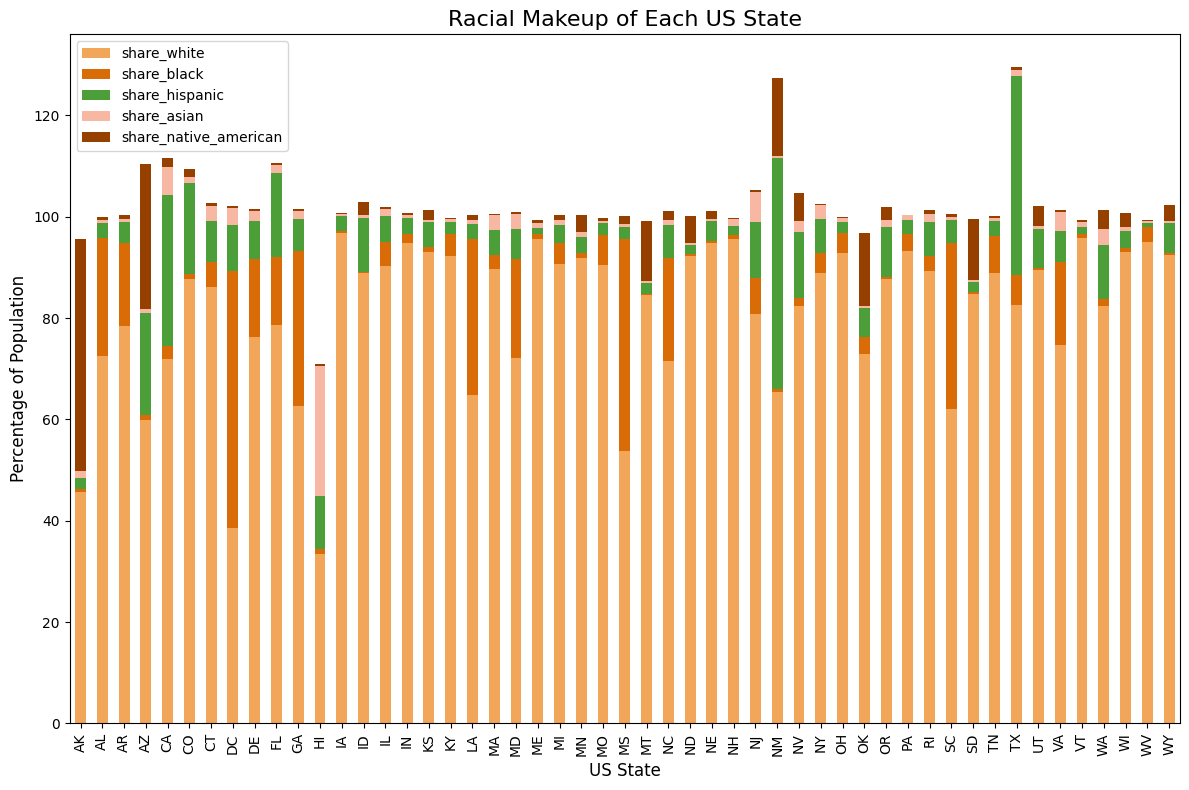

In [27]:
race_by_state.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    color=['#f2a65a', '#d96c06', '#4c9f38', '#f7b7a3', '#964000']  # Customize colors if desired
)

# Adding labels and title
plt.title('Racial Makeup of Each US State', fontsize=16)
plt.xlabel('US State', fontsize=12)
plt.ylabel('Percentage of Population', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [31]:
race_counts = df_fatalities['race'].value_counts()

race_labels = {
    'W': 'White',
    'B': 'Black',
    'H': 'Hispanic',
    'A': 'Asian',
    'N': 'Native American',
    'O': 'Other',
    'Unknown': 'Unknown'
}

# Map the abbreviations to full race names
race_counts.index = race_counts.index.map(race_labels)

# Define colors for each category
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Explode the 'Unknown' slice for better emphasis (optional)
explode = [0, 0, 0, 0, 0, 0, 0.1]  # Explode only the 'Unknown' category

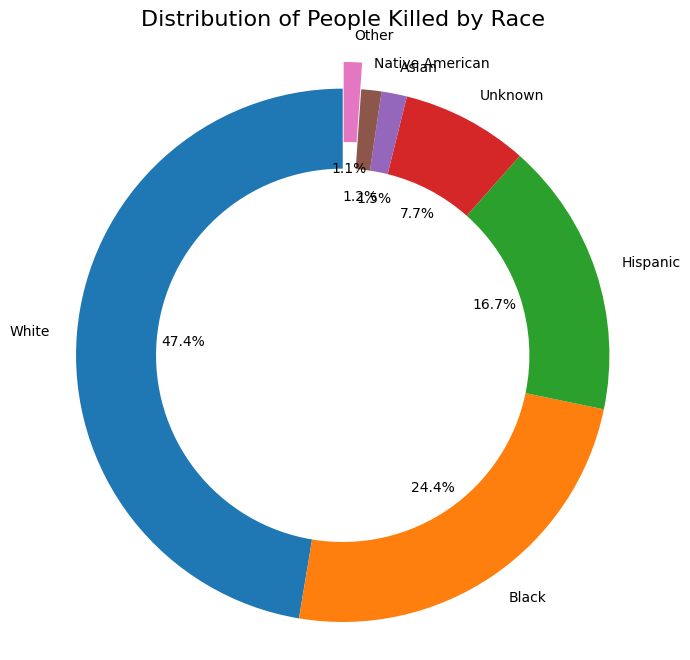

In [32]:
# Plotting the improved donut chart
plt.figure(figsize=(8, 8))
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=90,
        wedgeprops={'width': 0.3}, colors=colors, explode=explode)

# Adding a title
plt.title('Distribution of People Killed by Race', fontsize=16)

# Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [33]:
gender_counts = df_fatalities['gender'].value_counts()

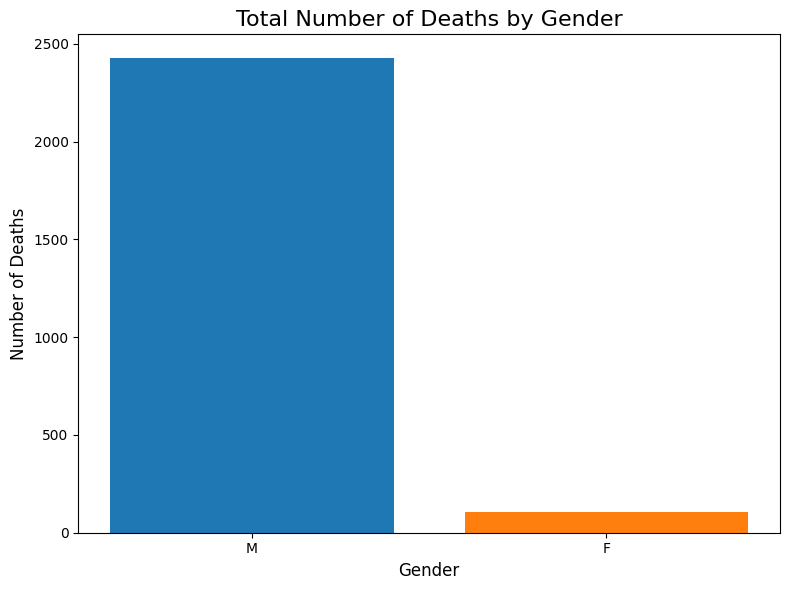

In [34]:
plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, gender_counts.values, color=['#1f77b4', '#ff7f0e'])

# Adding labels and title
plt.title('Total Number of Deaths by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Deaths', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [35]:
df_fatalities['age'] = pd.to_numeric(df_fatalities['age'], errors='coerce')

<ipython-input-37-f6c6a0fcb096>:9: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(x='manner_of_death', y='age', hue='gender', data=df_fatalities,


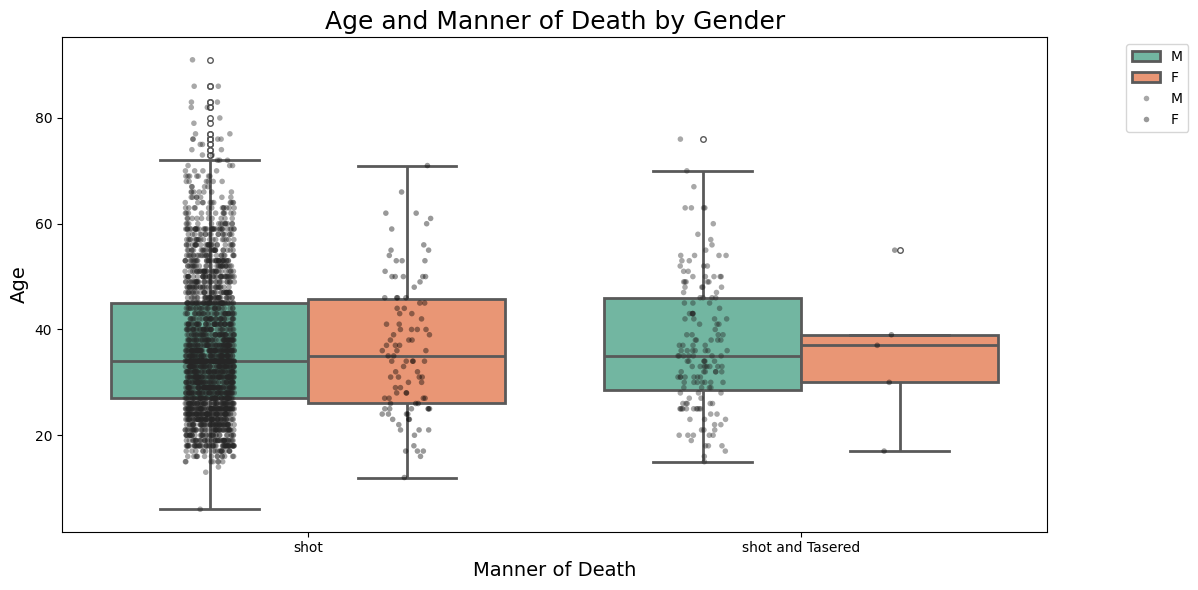

In [37]:
# Set up the figure size
plt.figure(figsize=(12, 6))

# Create a boxplot with custom colors and enhanced readability
sns.boxplot(x='manner_of_death', y='age', hue='gender', data=df_fatalities,
            palette="Set2", fliersize=4, linewidth=2)

# Add a strip plot on top of the box plot to show individual data points
sns.stripplot(x='manner_of_death', y='age', hue='gender', data=df_fatalities,
              dodge=True, jitter=True, color='black', size=4, alpha=0.4)

# Adjust labels and title for better readability
plt.title('Age and Manner of Death by Gender', fontsize=18)
plt.xlabel('Manner of Death', fontsize=14)
plt.ylabel('Age', fontsize=14)

# Adjust the legend to not overlap with the plot
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

plt.tight_layout()
plt.show()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [38]:
weapon_counts = df_fatalities['armed'].value_counts()

<ipython-input-39-7b4fc0ca14ca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weapon_counts.index, y=weapon_counts.values, palette='Set3')


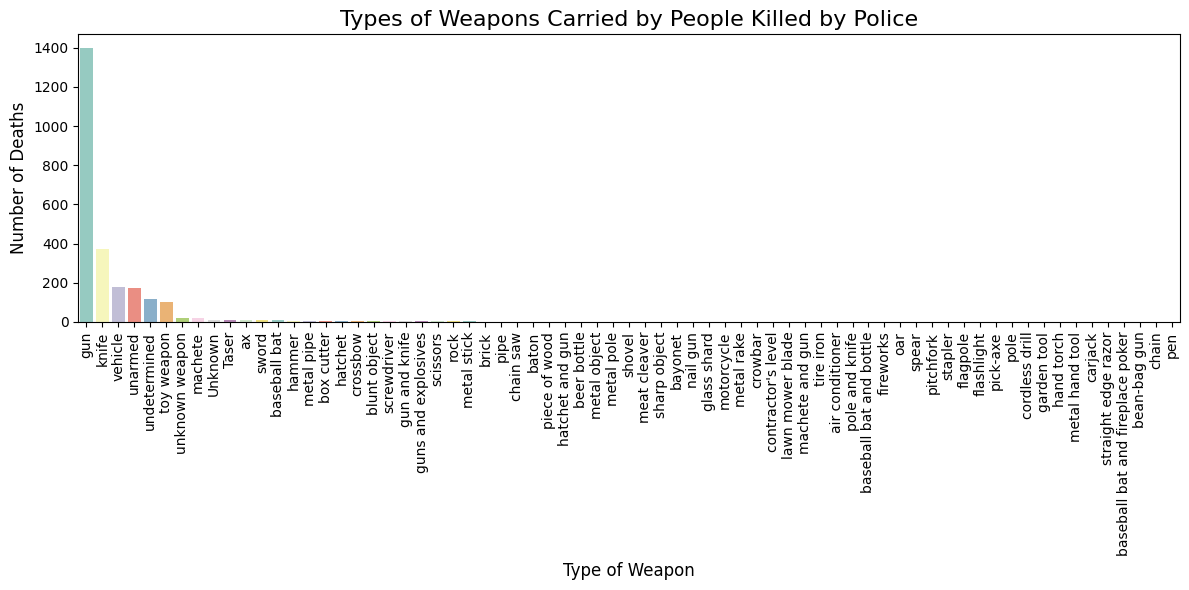

In [39]:
plt.figure(figsize=(12, 6))
sns.barplot(x=weapon_counts.index, y=weapon_counts.values, palette='Set3')

# Add labels and title
plt.title('Types of Weapons Carried by People Killed by Police', fontsize=16)
plt.xlabel('Type of Weapon', fontsize=12)
plt.ylabel('Number of Deaths', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

In [40]:
# Calculate the percentage of people who were armed versus unarmed
total_deaths = len(df_fatalities)
armed_percentage = (df_fatalities['armed'] != 'Unarmed').sum() / total_deaths * 100
unarmed_percentage = (df_fatalities['armed'] == 'Unarmed').sum() / total_deaths * 100

# Display the results
print(f"Percentage of people who were armed: {armed_percentage:.2f}%")
print(f"Percentage of people who were unarmed: {unarmed_percentage:.2f}%")

Percentage of people who were armed: 100.00%
Percentage of people who were unarmed: 0.00%


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [41]:
df_fatalities['age'] = pd.to_numeric(df_fatalities['age'], errors='coerce')

# Calculate the percentage of people killed who were under 25 years old
total_deaths = len(df_fatalities)
under_25_count = (df_fatalities['age'] < 25).sum()
under_25_percentage = (under_25_count / total_deaths) * 100

# Output the percentage of people under 25 years old
print(f"Percentage of people killed who were under 25 years old: {under_25_percentage:.2f}%")

Percentage of people killed who were under 25 years old: 17.75%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

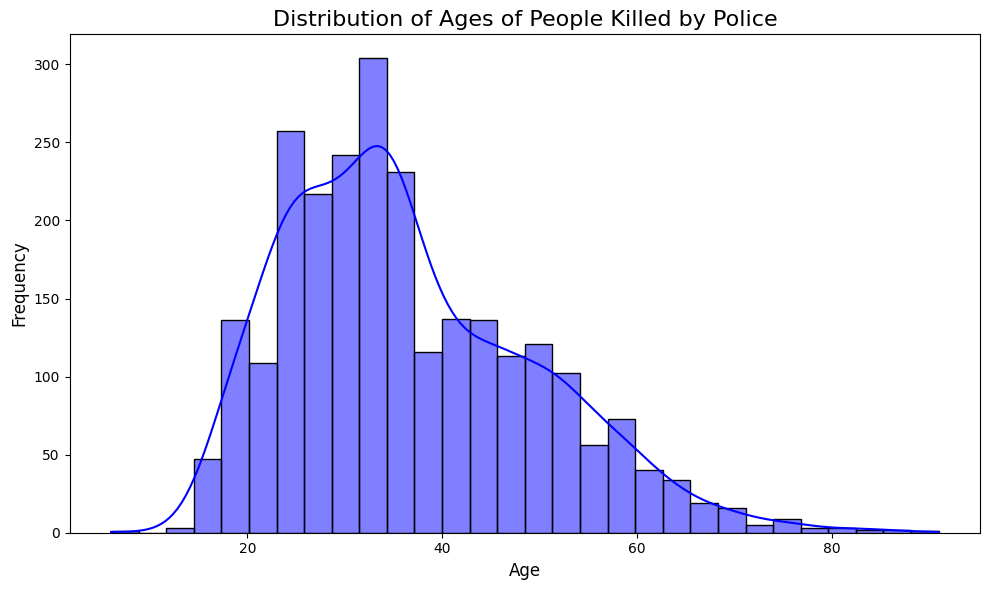

In [42]:
plt.figure(figsize=(10, 6))

# Plotting a histogram with KDE (Kernel Density Estimate)
sns.histplot(df_fatalities['age'].dropna(), kde=True, bins=30, color='blue')

# Add labels and title
plt.title('Distribution of Ages of People Killed by Police', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions?

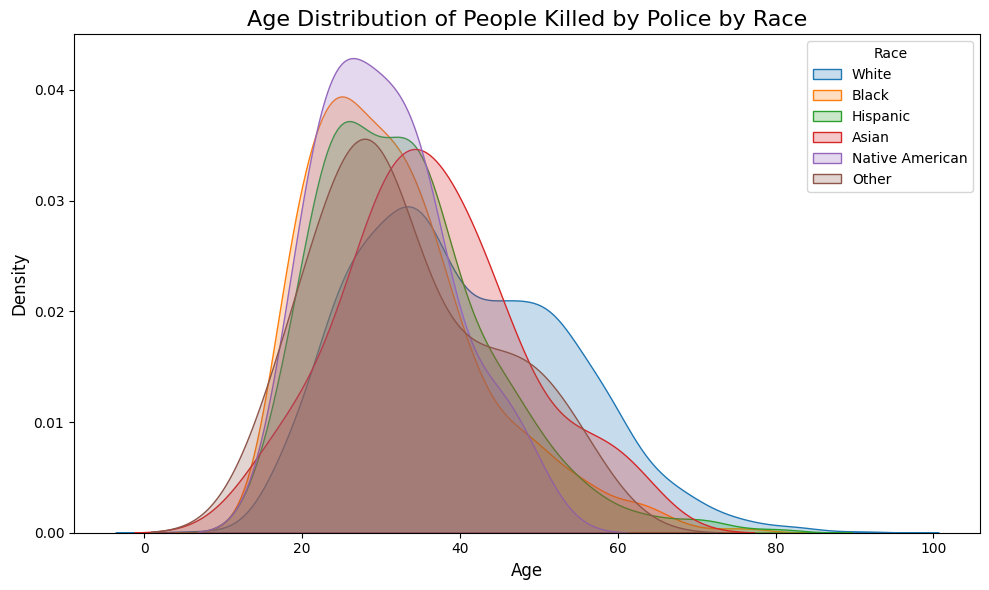

In [43]:
plt.figure(figsize=(10, 6))

# Plotting separate KDE plots for each race
sns.kdeplot(data=df_fatalities[df_fatalities['race'] == 'W']['age'], label='White', fill=True)
sns.kdeplot(data=df_fatalities[df_fatalities['race'] == 'B']['age'], label='Black', fill=True)
sns.kdeplot(data=df_fatalities[df_fatalities['race'] == 'H']['age'], label='Hispanic', fill=True)
sns.kdeplot(data=df_fatalities[df_fatalities['race'] == 'A']['age'], label='Asian', fill=True)
sns.kdeplot(data=df_fatalities[df_fatalities['race'] == 'N']['age'], label='Native American', fill=True)
sns.kdeplot(data=df_fatalities[df_fatalities['race'] == 'O']['age'], label='Other', fill=True)

# Add labels and title
plt.title('Age Distribution of People Killed by Police by Race', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Add a legend to distinguish between races
plt.legend(title="Race")

# Show the plot
plt.tight_layout()
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [44]:
race_counts = df_fatalities['race'].value_counts()

<ipython-input-46-7bce0676ecc3>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=race_counts.index, y=race_counts.values, palette='Set2')


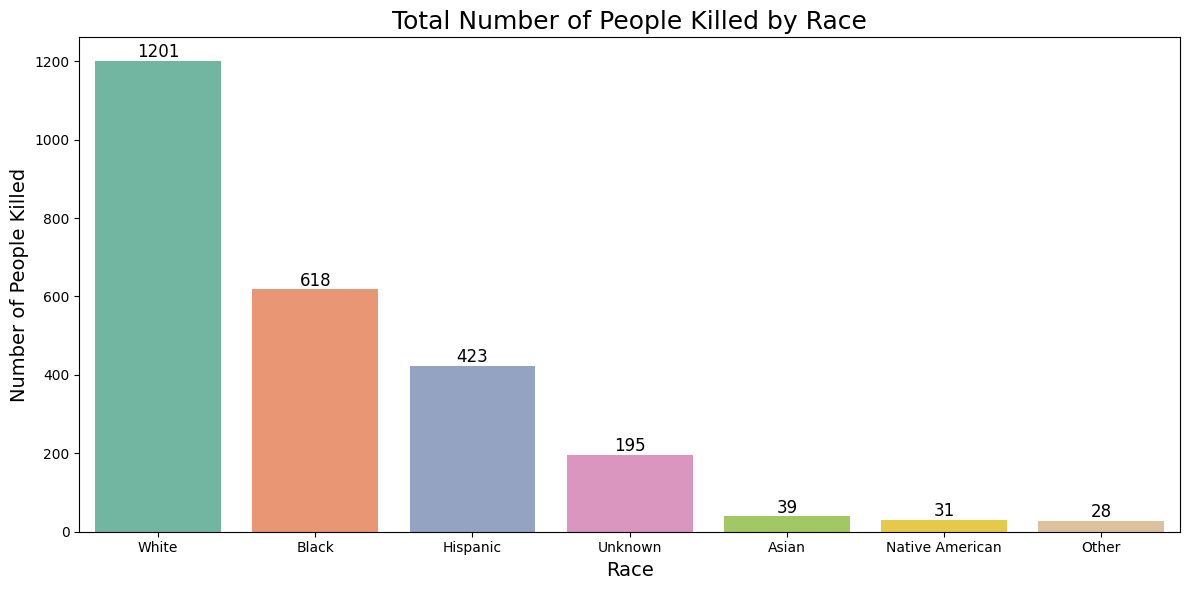

In [46]:
# Full race labels for better clarity
race_labels = {
    'W': 'White',
    'B': 'Black',
    'H': 'Hispanic',
    'A': 'Asian',
    'N': 'Native American',
    'O': 'Other',
    'Unknown': 'Unknown'
}

# Map the race labels to the value counts
race_counts.index = race_counts.index.map(race_labels)

# Plotting the improved bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=race_counts.index, y=race_counts.values, palette='Set2')

# Add value labels above each bar
for i, value in enumerate(race_counts.values):
    plt.text(i, value + 10, str(value), ha='center', fontsize=12)

# Add labels and title
plt.title('Total Number of People Killed by Race', fontsize=18)
plt.xlabel('Race', fontsize=14)
plt.ylabel('Number of People Killed', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [47]:
total_deaths = len(df_fatalities)
mental_illness_count = (df_fatalities['signs_of_mental_illness'] == 'True').sum()
mental_illness_percentage = (mental_illness_count / total_deaths) * 100


In [48]:
print(f"Percentage of people killed with mental illness: {mental_illness_percentage:.2f}%")

Percentage of people killed with mental illness: 0.00%


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [49]:
top_cities = df_fatalities['city'].value_counts().head(10)


<ipython-input-50-374acb17c7fb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='coolwarm')


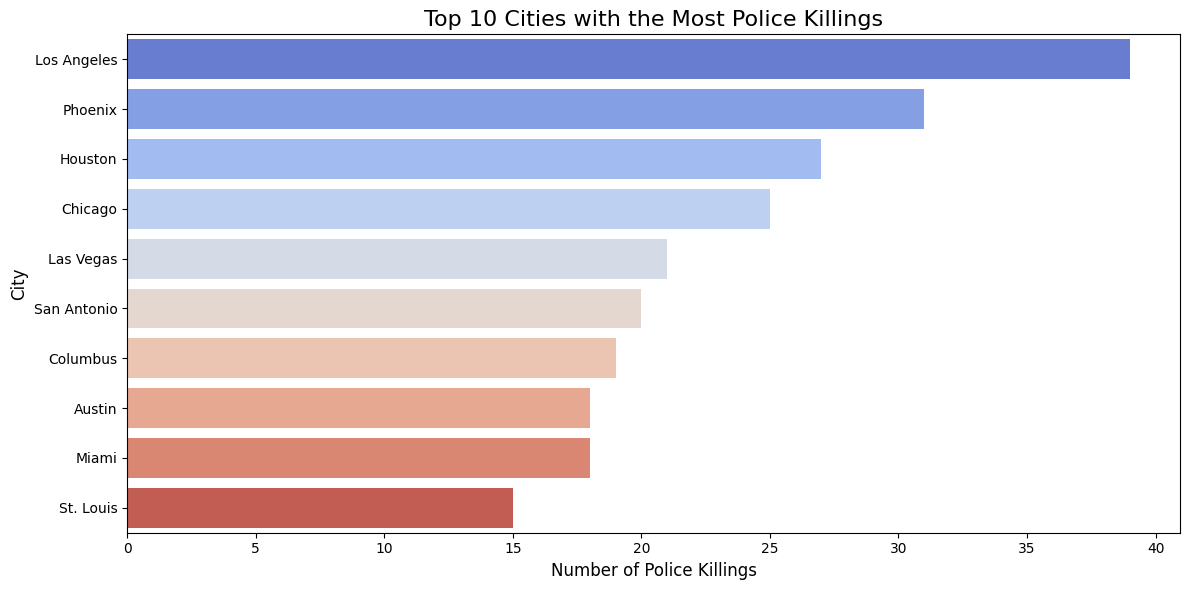

In [50]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='coolwarm')

# Add labels and title
plt.title('Top 10 Cities with the Most Police Killings', fontsize=16)
plt.xlabel('Number of Police Killings', fontsize=12)
plt.ylabel('City', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [53]:
# Get the top 10 cities with the most police killings
top_cities = df_fatalities['city'].value_counts().head(10).index

# Filter the dataset to include only the top 10 cities
df_top_cities = df_fatalities[df_fatalities['city'].isin(top_cities)]

# Group by city and race, and count the number of killings for each race in each city
city_race_counts = df_top_cities.groupby(['city', 'race']).size().unstack(fill_value=0)

# Get the total number of killings for each city
total_killings_per_city = df_top_cities['city'].value_counts()

# Sort the cities by total killings
sorted_cities = total_killings_per_city.index

# Calculate the rate of killings for each race by dividing the race counts by the total killings in each city
city_race_rate = city_race_counts.loc[sorted_cities].div(total_killings_per_city, axis=0)



<Figure size 1200x800 with 0 Axes>

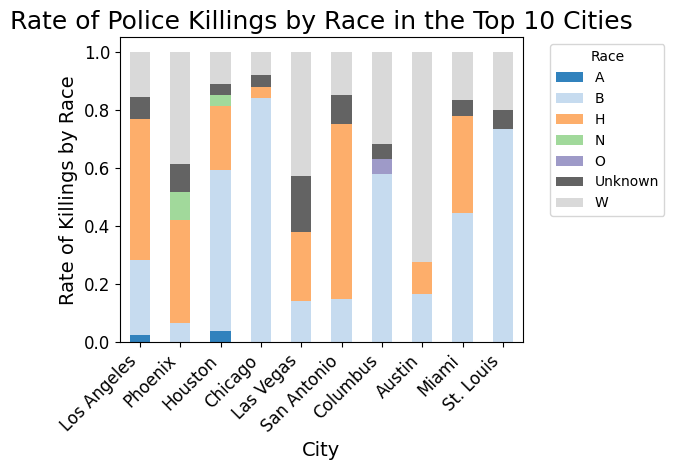

In [54]:
plt.figure(figsize=(12, 8))
city_race_rate.plot(kind='bar', stacked=True, colormap='tab20c')

# Add labels and title
plt.title('Rate of Police Killings by Race in the Top 10 Cities', fontsize=18)
plt.xlabel('City', fontsize=14)
plt.ylabel('Rate of Killings by Race', fontsize=14)

# Position the legend outside the plot for better readability
plt.legend(title="Race", bbox_to_anchor=(1.05, 1), loc='upper left')

# Increase label and tick font sizes for readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [55]:
killings_by_state = df_fatalities['state'].value_counts().reset_index()
killings_by_state.columns = ['state', 'num_killings']

In [56]:
fig = px.choropleth(killings_by_state,
                    locations='state',
                    locationmode="USA-states",
                    color='num_killings',
                    scope="usa",
                    color_continuous_scale="reds",
                    title="Police Killings by US State")

# Display the map
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [59]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'], errors='coerce')


In [60]:
print("Number of unparsed dates:", df_fatalities['date'].isna().sum())


Number of unparsed dates: 0


In [61]:
df_fatalities['year'] = df_fatalities['date'].dt.year
killings_per_year = df_fatalities['year'].value_counts().sort_index()

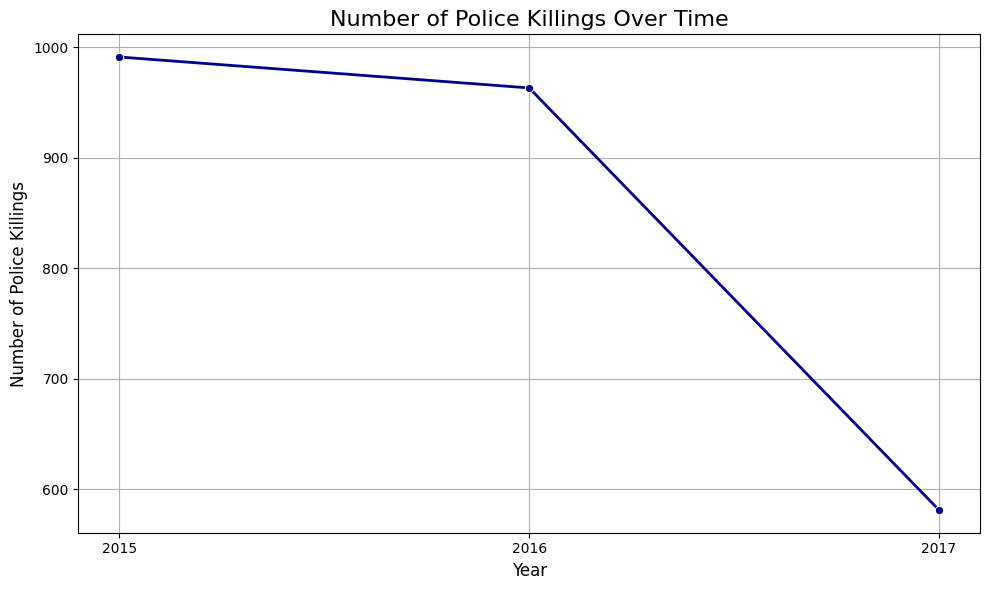

In [64]:
plt.figure(figsize=(10, 6))

# Plot with smoother line style and distinct color
sns.lineplot(x=killings_per_year.index, y=killings_per_year.values, marker='o', color='darkblue', linewidth=2)

# Customize x-ticks to display full years
plt.xticks(killings_per_year.index)

# Add gridlines for better readability
plt.grid(True)

# Add labels and title
plt.title('Number of Police Killings Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Police Killings', fontsize=12)

plt.tight_layout()
plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).